In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def plot_graph(G, title):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # positions for all nodes

    # Get the node values and corresponding colors
    node_values = nx.get_node_attributes(G, 'value')
    node_colors = [G.nodes[node]['color'] for node in G.nodes()]

    # Draw nodes with their values as labels
    nx.draw(G, pos, with_labels=True, labels=node_values, node_size=400, node_color=node_colors, font_size=10, font_weight='bold', edge_color='gray')
    
    plt.title(title)
    plt.show()

def add_random_values_and_colors(G):
    for node in G.nodes():
        value = random.randint(1, 10)
        G.nodes[node]['value'] = value
        G.nodes[node]['color'] = plt.cm.gnuplot(value / 10)  # Normalize the value to get a color

def erdos_renyi_graph(n, p):
    G =     .erdos_renyi_graph(n, p)
    # Simplifying the network by considering only the largest component
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)

    add_random_values_and_colors(G)
    plot_graph(G, f"Érdos-Renyi Graph (n={n}, p={p})")

def watts_strogatz_graph(n, k, p):
    G = nx.watts_strogatz_graph(n, k, p)
    # Simplifying the network by considering only the largest component
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)

    add_random_values_and_colors(G)
    plot_graph(G, f"Watts-Strogatz Graph (n={n}, k={k}, p={p})")

def barabasi_albert_graph(n, m):
    G = nx.barabasi_albert_graph(n, m)
    # Simplifying the network by considering only the largest component
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)

    add_random_values_and_colors(G)
    plot_graph(G, f"Barabási-Albert Graph (n={n}, m={m})")


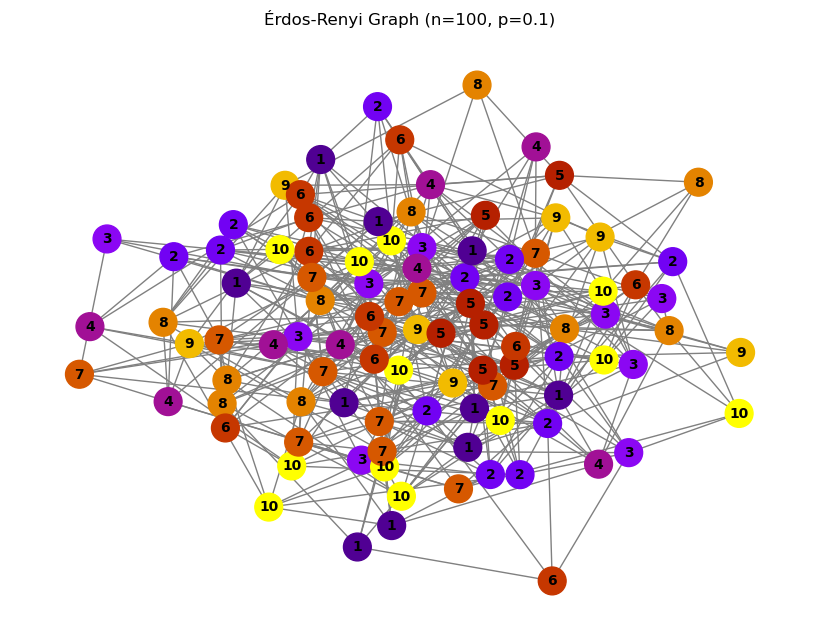

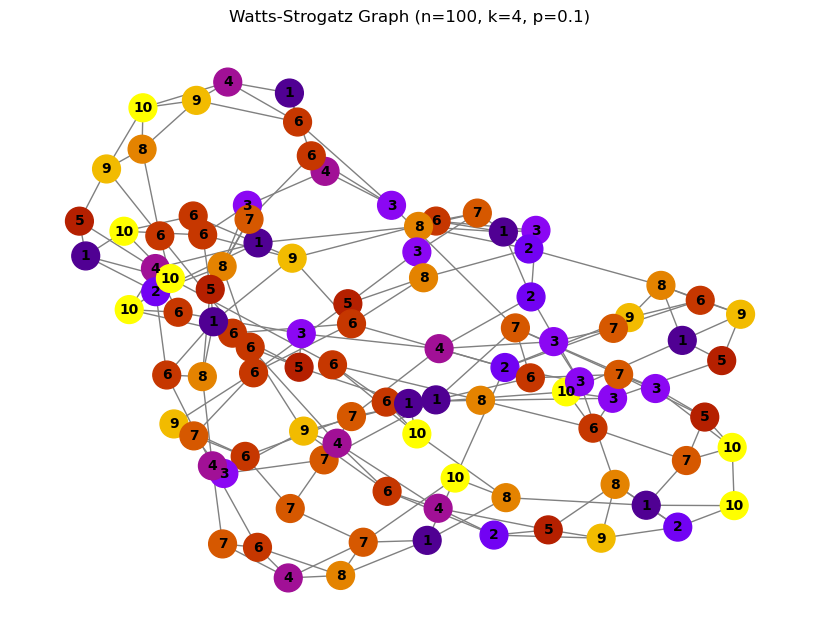

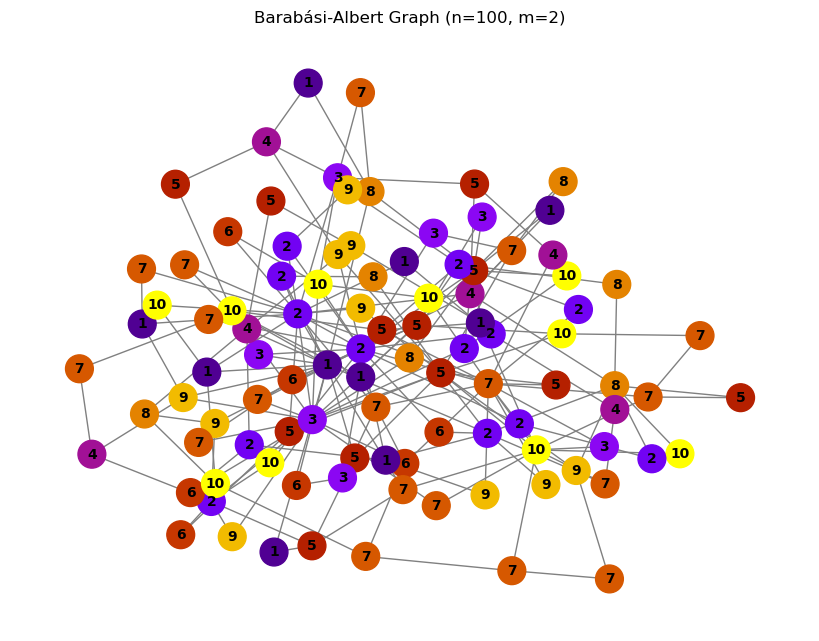

In [23]:
# Parameters for the graphs
n = 100  # Number of nodes

p = 0.1  # Probability for edge creation (Érdos-Renyi)

k = 4  # Each node is joined with its k nearest neighbors in ring topology (Watts-Strogatz)
rewire_prob = 0.1  # The probability of rewiring each edge (Watts-Strogatz)

m = 2  # Number of edges to attach from a new node to existing nodes (Barabási-Albert)
# Create and visualize graphs
erdos_renyi_graph(n, p)
watts_strogatz_graph(n, k, rewire_prob)
barabasi_albert_graph(n, m)